 R=6.4e+04
 Q=0.9
 wpll=2.9e+06
 w3db=3.2e+06
 w3db/wpll = 1.1


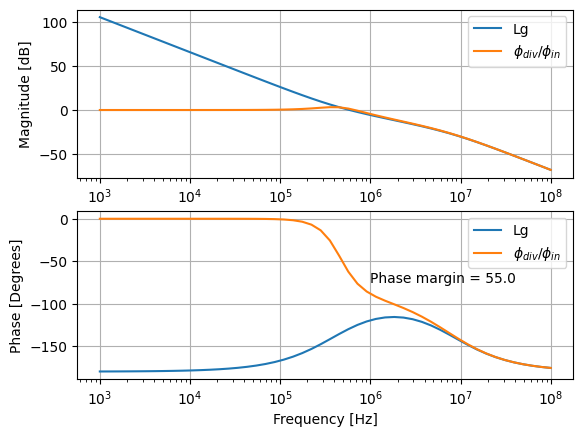

In [2]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt

def plot(f,Hs,lbl,find):
    mag = 20*np.log10(abs(Hs))
    phase = 360*np.angle(Hs)/(2*np.pi)
    zero_crossings = np.where(np.diff(np.signbit(mag)))[0]
    plt.subplot(2,1,1)
    plt.semilogx(f,mag,label=lbl)
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude [dB]")
    plt.grid(True)
    plt.legend()
    plt.subplot(2,1,2)
    plt.semilogx(f,phase,label=lbl)
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Phase [Degrees]")
    plt.grid(True)
    plt.legend()


#- Loop Model
f = np.logspace(3,8)

s = 1j*2*np.pi*f

#- See sim/RCOSC
Kvco = 2*np.pi*1.6e9

#- Current divided by 2 pi
Kpd = 1e-6/(2*np.pi)

R = 32e3*2    
#C1 = 6.024e-12
#C2 = 0.33e-12
C1 = 6.024e-12
C2 = 0.33e-12

Klp = 1/C1

N = 32

#- Fix PLL
# Set Q=0.1
# Choose w3db=0.1wpll

wpll = np.sqrt(Kpd*Klp*Kvco/N)
wz = 1/(R*C1)
w3db = wpll**2/wz

Q = wz/wpll
print(" R=%.2g"%R)
print(" Q=%.2g"%Q)
print(" wpll=%.2g"%wpll)
print(" w3db=%.2g"%w3db)
print(" w3db/wpll = %.2g" %(w3db/wpll))

KlpHlp = 1/np.multiply((C1 + C2),s)* \
    (1 + np.multiply(s,(R*C1)))/(1 + np.multiply(s,R*(C1*C2)/(C1 + C2)))


Ls = np.divide(Kvco*Kpd*KlpHlp, N*s)
Cs = np.divide(Ls,1 + Ls)

#TODO : Fix -3dB frequency
mag = 20*np.log10(np.abs(Ls))
f_ind = np.where(mag < 0)[0][0]

phase = 360*np.angle(Ls)/(2*np.pi)


#- Plot stuff
doPlot = True
if(doPlot):
    plot(f,Ls,"Lg",f_ind)
    plot(f,Cs,"$\phi_{div}/\phi_{in}$",f_ind)
    plt.text(1e6,-75,"Phase margin = %.1f" % (phase[f_ind] + 180     ))
    plt.savefig("pll.pdf")
    plt.show()

